## <span style="color:#2F749F;"><strong>📦 Sesión práctica 2: Análisis Univariado, bivariado y multivariado</strong></span>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [3]:
nombre = input("📝 Ingresa tu nombre completo: ")
correo = input("📧 Ingresa tu correo electrónico: ")
cedula = input("🔢 Ingresa tu cédula: ")
#cambié que fueran los 6 últimos dígitos por la cédula completa
#porque esta fue la manera en la que conseguí eliminar la bimodalidad de mis datos


📝 Ingresa tu nombre completo: Estefanía Hurtado Reina
📧 Ingresa tu correo electrónico: estefania.hurtado@udea.edu.co
🔢 Ingresa tu cédula: 1335282832


## <span style="color:black;"><strong>Parte 1: Análisis Univariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>

A partir de una muestra simulada de ingresos, calcula la **media, mediana y moda**, y luego a interpretarlas.

1. Usa el número base `528310` (debes reemplazarlo con los últimos 6 dígitos de tu documento de identificación).  
2. Con este número genera una semilla (`np.random.seed`) para que los resultados sean reproducibles.  
3. Los ingresos se simulan con una distribución normal:  
   - Media teórica: `(base % 10) + 2`  
   - Desviación estándar: `2`  
   - Tamaño de muestra: `30`  
4. Los valores negativos se reemplazan por cero (pues los ingresos no pueden ser negativos).  
5. Grafica tus resultados (ver imagen de ejemplo)


In [4]:
#Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency

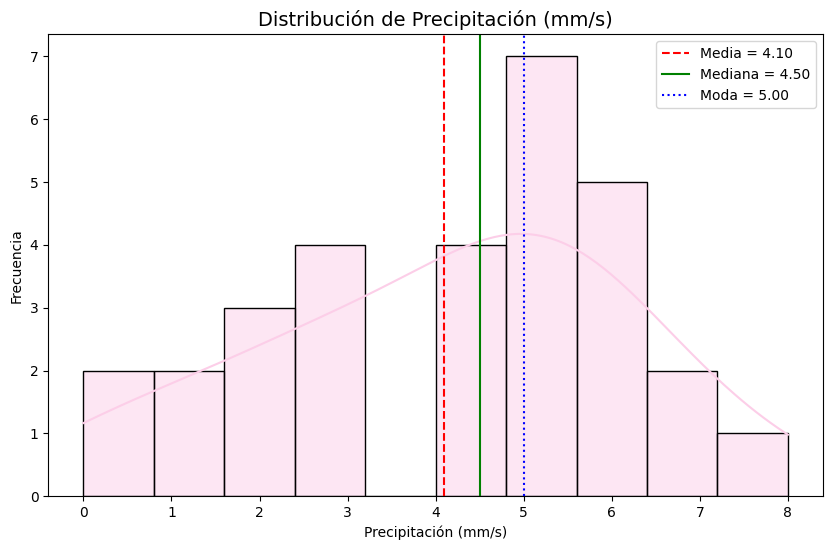

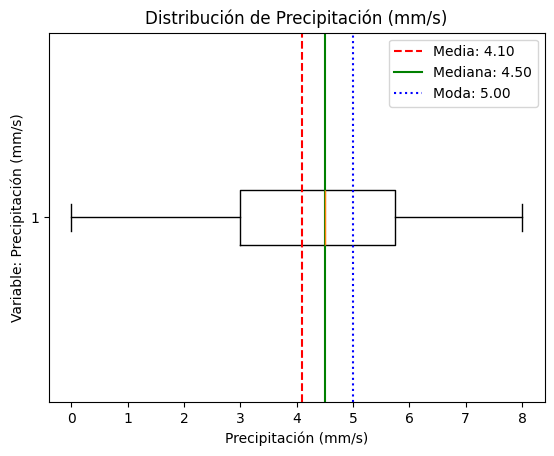

Interpretación de resultados de la variable: Precipitación
La precipitación promedio teórica es 4 mm, lo que representa el valor esperado según la distribución.
La precipitación promedio observada en los datos es 4.1 mm, que refleja el valor medio real registrado en la muestra.
La mediana de la precipitación es 4.5 mm, lo que indica que la mitad de los registros presentaron valores menores o iguales a este y la otra mitad mayores.
La moda de la precipitación es 5 mm, que corresponde al valor que se repite con mayor frecuencia en los datos.
La precipitación promedio observada (4.10 mm) es mayor que la teórica (4.00 mm) en 0.1 mm.
La media, mediana y moda de la precipitación son distintas, lo que indica que la distribución es asimétrica o presenta variabilidad.


In [5]:
#Elegir variable
variable_name = "Precipitación (mm/s)"
color= "#FCCEE8"

# 1,2. Base y semilla
base = int(cedula)
np.random.seed(base)

# 3. Condiciones de la simulación
media_teorica = (base % 10) + 2 # la media depende del último dígito de base, y siempre se le suma 2
desviacion = 2
n = 30

# 4. Simulación de la variable y eliminar valores negativos
variable = np.random.normal(media_teorica, desviacion, n) #los ingresos se simulan con una distribución normal
variable[variable < 0] = 0 #reemplazar valores negativos por 0
variable = np.round(variable).astype(int)

# 5. Medidas estadísticas y gráfica
media = np.mean(variable)
mediana = np.median(variable)
moda = stats.mode(variable, keepdims=True)[0][0]

#Visualización histograma
plt.figure(figsize=(10,6))
sns.histplot(variable, bins=10, kde=True, color=color) #kde= Kernel Density Estimation

#Medidas de tendencia central
plt.axvline(media, color="red", linestyle="--", label=f"Media = {media:.2f}")
plt.axvline(mediana, color="green", linestyle="-", label=f"Mediana = {mediana:.2f}")
plt.axvline(moda, color="blue", linestyle=":", label=f"Moda = {moda:.2f}")

#Estética
plt.title(f"Distribución de {variable_name}", fontsize=14)
plt.xlabel(f"{variable_name}")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Visualización boxplot
plt.boxplot(variable, vert=False)
plt.title(f"Distribución de {variable_name}")
plt.xlabel(f"{variable_name}")
plt.ylabel(f"Variable: {variable_name}")
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='blue', linestyle=':', label=f'Moda: {moda:.2f}')
plt.legend()
plt.show()

# Interpretación de resultados
print("Interpretación de resultados de la variable: Precipitación")

print(f"La precipitación promedio teórica es {round(media_teorica,2)} mm, lo que representa el valor esperado según la distribución.")
print(f"La precipitación promedio observada en los datos es {round(media,2)} mm, que refleja el valor medio real registrado en la muestra.")
print(f"La mediana de la precipitación es {round(mediana,2)} mm, lo que indica que la mitad de los registros presentaron valores menores o iguales a este y la otra mitad mayores.")
print(f"La moda de la precipitación es {round(moda,2)} mm, que corresponde al valor que se repite con mayor frecuencia en los datos.")

# Diferencia entre media teórica y observada
diferencia = round(media - media_teorica, 2)
if diferencia > 0:
    print(f"La precipitación promedio observada ({media:.2f} mm) es mayor que la teórica ({media_teorica:.2f} mm) en {diferencia} mm.")
elif diferencia < 0:
    print(f"La precipitación promedio observada ({media:.2f} mm) es menor que la teórica ({media_teorica:.2f} mm) en {abs(diferencia)} mm.")
else:
    print(f"La precipitación promedio observada coincide con la teórica ({media_teorica:.2f} mm).")

# Comparación entre medidas de posición central
if media == mediana == moda:
    print("La media, mediana y moda de la precipitación son iguales: la distribución es simétrica en sus medidas centrales.")
elif media == mediana and media != moda:
    print("La media y la mediana de la precipitación coinciden, pero la moda es diferente, lo que indica ligera asimetría.")
elif media == moda and media != mediana:
    print("La media y la moda de la precipitación coinciden, pero la mediana es diferente, lo que sugiere cierta variación en la simetría.")
elif mediana == moda and media != mediana:
    print("La mediana y la moda de la precipitación coinciden, pero la media es diferente, lo que refleja una posible dispersión en los datos.")
else:
    print("La media, mediana y moda de la precipitación son distintas, lo que indica que la distribución es asimétrica o presenta variabilidad.")


### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza qué tan dispersos están los datos respecto a su media. Calcula:
1. Rango
2. Varianza
3. Desviación estándar
4. Coeficiente de variación
5. Genera una gráfica con los resultados obtenidos (ver imagen de ejemplo)


Medidas de dispersión:
Rango: 8
Varianza: 4.37
Desviación estándar: 2.09
Coeficiente de variación: 0.51


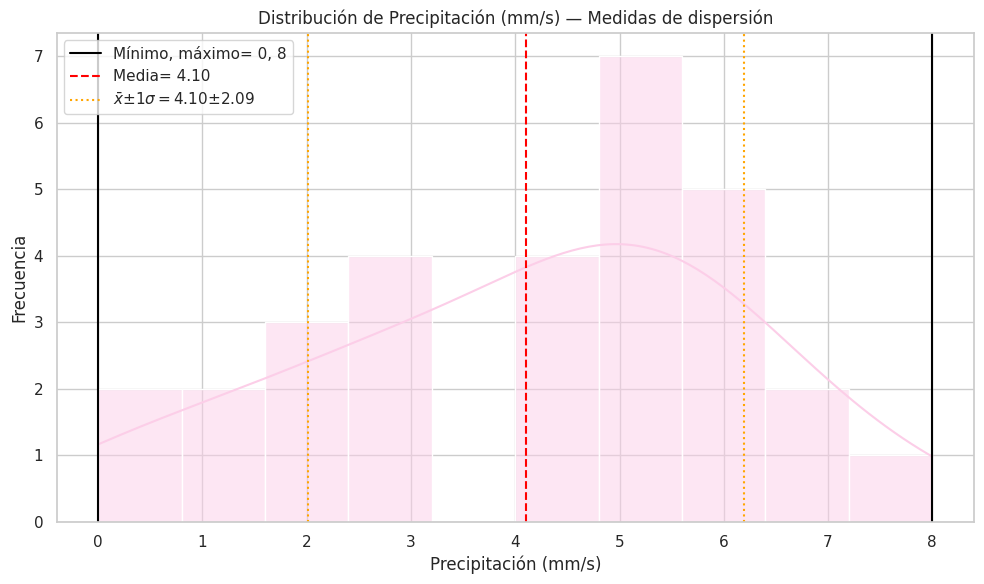

Interpretación de resultados de la dispersión en la variable: Precipitación
-El rango de precipitación es 8 mm, lo que representa la diferencia entre el valor máximo y el mínimo observado, mostrando la amplitud total de los registros.
-La varianza de la precipitación es 4.37 (mm^2), lo que indica el grado promedio en que los valores se alejan de la media; valores más altos reflejan mayor dispersión en los datos.
-La desviación estándar de la precipitación es 2.09 mm, lo que señala en promedio cuánto tienden a desviarse los registros respecto al valor medio.
-El coeficiente de variación de la precipitación es 0.51%, lo que representa la dispersión relativa de los datos en proporción a la media; es decir, el porcentaje de variabilidad respecto al promedio.
- La variabilidad relativa de la precipitación es baja, lo que sugiere que los valores son bastante homogéneos en torno a la media.
- La desviación estándar es considerable respecto a la media, lo que sugiere que los valores de precipi

In [6]:
#1,2,3,4. Medidas de dispersión
min= np.min(variable)
max= np.max(variable)
rango = max-min
varianza = np.var(variable, ddof=1)   # ddof: grado de libertad
desviacion = np.std(variable, ddof=1)
coef_var = desviacion / media #eL coef_var % de los datos difiere de la media

print("Medidas de dispersión:")
print("Rango:", round(rango, 2))
print("Varianza:", round(varianza, 2))
print("Desviación estándar:", round(desviacion, 2))
print("Coeficiente de variación:", round(coef_var, 2))

# 5. Gráfica
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(variable, bins=10, kde=True, color=color)

# Líneas de referencia
plt.axvline(np.min(variable), color="black", linestyle="-", label=f"Mínimo, máximo= {min}, {max}")
plt.axvline(np.max(variable), color="black", linestyle="-")
plt.axvline(media, color="red", linestyle="--", label=f"Media= {media:.2f}")
plt.axvline(media - desviacion, color="orange", linestyle=":", label=fr'$\bar{{x}} ± 1\sigma = {media: .2f} ± {desviacion: .2f}$')
plt.axvline(media + desviacion, color="orange", linestyle=":")

#Título y etiquetas
plt.title(f"Distribución de {variable_name} — Medidas de dispersión")
plt.xlabel(f"{variable_name}")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

# Interpretación de resultados en términos de dispersión de la precipitación
print("Interpretación de resultados de la dispersión en la variable: Precipitación")

print(f"-El rango de precipitación es {round(rango,2)} mm, lo que representa la diferencia entre el valor máximo y el mínimo observado, mostrando la amplitud total de los registros.")
print(f"-La varianza de la precipitación es {round(varianza,2)} (mm^2), lo que indica el grado promedio en que los valores se alejan de la media; valores más altos reflejan mayor dispersión en los datos.")
print(f"-La desviación estándar de la precipitación es {round(desviacion,2)} mm, lo que señala en promedio cuánto tienden a desviarse los registros respecto al valor medio.")
print(f"-El coeficiente de variación de la precipitación es {round(coef_var,2)}%, lo que representa la dispersión relativa de los datos en proporción a la media; es decir, el porcentaje de variabilidad respecto al promedio.")

"""
CV < 10% → Variabilidad baja (datos homogéneos)
10% ≤ CV < 30% → Variabilidad moderada
CV ≥ 30% → Variabilidad alta
"""
if coef_var < 10:
    print("- La variabilidad relativa de la precipitación es baja, lo que sugiere que los valores son bastante homogéneos en torno a la media.")
elif 10 <= coef_var < 30:
    print("- La variabilidad relativa de la precipitación es moderada, lo que indica cierta dispersión, aunque los datos aún mantienen cierta consistencia.")
else:
    print("-La variabilidad relativa de la precipitación es alta, lo que refleja que los registros presentan grandes diferencias respecto al promedio.")
"""
Desviación estándar < 0.5 × media → Dispersión relativamente baja
Desviación estándar ≥ 0.5 × media → Dispersión considerable
"""
if desviacion < (0.5 * media):
    print("- La desviación estándar es relativamente pequeña en comparación con la media, lo que indica estabilidad en los registros de precipitación.")
else:
    print("- La desviación estándar es considerable respecto a la media, lo que sugiere que los valores de precipitación son más heterogéneos o presentan eventos extremos.")

### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza la distribución de los datos. Calcula:
1. Asimetría
2. Curtosis
3. Realiza la comparación con la distribución normal (ver la imagen de ejemplo)



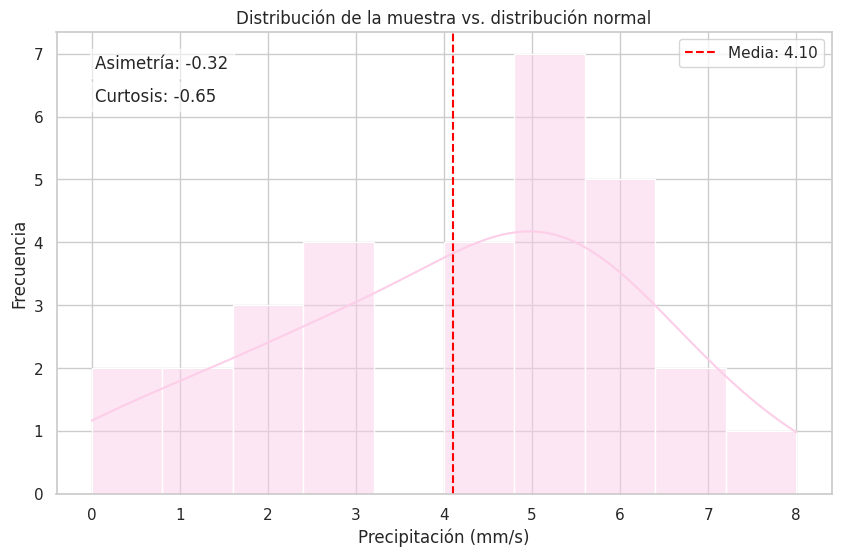

Interpretación de resultados
-El coeficiente de asimetría es -0.32, lo que indica el grado y dirección de la falta de simetría en la distribución de la precipitación.
-La distribución de la precipitación presenta asimetría negativa: hay una cola más larga hacia la izquierda, lo que indica que se registran valores inusualmente bajos de precipitación.
-El coeficiente de curtosis es -0.65, lo que señala el grado de concentración de los valores en torno a la media (comparado con una distribución normal).
-La distribución de la precipitación es platicúrtica: los valores están más dispersos y las colas son más ligeras, lo que refleja menor presencia de extremos.


In [7]:
#1,2. Asimetría y curtosis
asimetria = stats.skew(variable)
curtosis = stats.kurtosis(variable)  # Fisher (0 = normal)

# 3. Gráfica
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(variable, bins=10, kde=True, color=color)
plt.axvline(media, color="red", linestyle="--", label=f"Media: {media:.2f}")

# Caja de texto con resultados
# Anotaciones en la esquina superior izquierda
plt.text(0.05, 0.95, f"Asimetría: {asimetria:.2f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.05, 0.88, f"Curtosis: {curtosis:.2f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.title("Distribución de la muestra vs. distribución normal")
plt.xlabel(f"{variable_name}")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

#Interpretación de resultados
print("Interpretación de resultados")
print(f"-El coeficiente de asimetría es {round(asimetria,2)}, lo que indica el grado y dirección de la falta de simetría en la distribución de la precipitación.")
if asimetria > 0:
    print("-La distribución de la precipitación presenta asimetría positiva: hay una cola más larga hacia la derecha, lo que sugiere que existen registros de precipitación excepcionalmente altos.")
elif asimetria < 0:
    print("-La distribución de la precipitación presenta asimetría negativa: hay una cola más larga hacia la izquierda, lo que indica que se registran valores inusualmente bajos de precipitación.")
else:
    print("-El coeficiente de asimetría es 0, lo que indica que la distribución de la precipitación es perfectamente simétrica.")

print(f"-El coeficiente de curtosis es {round(curtosis,2)}, lo que señala el grado de concentración de los valores en torno a la media (comparado con una distribución normal).")
if curtosis > 0:
    print("-La distribución de la precipitación es leptocúrtica: presenta una mayor concentración de valores cerca de la media, con colas más largas y probabilidad más alta de valores extremos.")
elif curtosis < 0:
    print("-La distribución de la precipitación es platicúrtica: los valores están más dispersos y las colas son más ligeras, lo que refleja menor presencia de extremos.")
else:
    print("-El coeficiente de curtosis es 0, lo que indica que la distribución de la precipitación es mesocúrtica, similar a la normal, con una concentración y colas estándar.")


### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>

A partir de la muestra generada en el Ejercicio 1, calcula los percentiles de tus datos. Calcula:
1. Percentiles
2. Deciles
3. Cuartiles
4. Grafica los anteriores percentiles calculados, sobre la distribución de tus datos (ver la imagen de ejemplo)




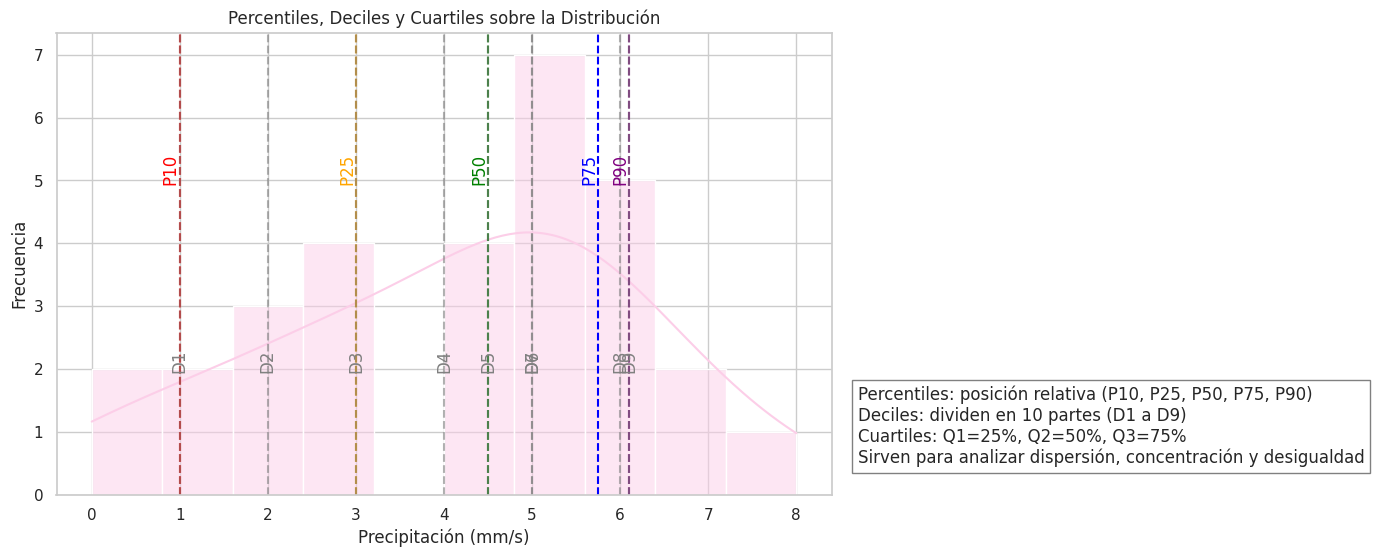

Interpretación de resultados de la distribución de la precipitación mediante percentiles, deciles y cuartiles
-El percentil 10 (P10) es 1.0 mm, lo que indica que el 10% de los registros de precipitación son menores o iguales a este valor.
-El percentil 25 (P25 o Q1) es 3.0 mm, lo que señala que el 25% de los datos están por debajo de este nivel de precipitación.
-El percentil 50 (P50 o Mediana) es 4.5 mm, indicando que la mitad de los registros están por debajo y la otra mitad por encima de este valor.
-El percentil 75 (P75 o Q3) es 5.75 mm, lo que significa que el 75% de los registros se encuentran por debajo de este valor de precipitación.
-El percentil 90 (P90) es 6.1 mm, mostrando que solo el 10% de los registros superan este nivel, es decir, son valores de precipitación altos o extremos.
-El primer cuartil (Q1) es 3.0 mm, el segundo cuartil (Q2 o Mediana) es 4.5 mm, y el tercer cuartil (Q3) es 5.75 mm.
-Estos cuartiles dividen la distribución de la precipitación en cuatro partes i

In [8]:
#1,2,3. Percentiles, deciles y cuartiles

percentiles = {
    "P10": {'value': np.percentile(variable, 10), 'color': 'red', 'linestyle': '--'},
    "P25": {'value': np.percentile(variable, 25), 'color': 'orange', 'linestyle': '--'},  # Q1
    "P50": {'value': np.percentile(variable, 50), 'color': 'green', 'linestyle': '--'},  # Mediana = Q2
    "P75": {'value': np.percentile(variable, 75), 'color': 'blue', 'linestyle': '--'},  # Q3
    "P90": {'value': np.percentile(variable, 90), 'color': 'purple', 'linestyle': '--'}
}


deciles = [np.percentile(variable, i*10) for i in range(1,10)]

cuartiles = [np.percentile(variable, 25),
             np.percentile(variable, 50),
             np.percentile(variable, 75)]

# 4. Gráfica
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(variable, bins=10, kde=True, color=color)

# Líneas verticales de percentiles
for label, data in percentiles.items():
    plt.axvline(data['value'], color=data['color'], linestyle=data['linestyle'])
    plt.text(data['value'], 5, label, rotation=90, color=data['color'], ha="right")

# Dibujar deciles
for label, data in enumerate(deciles, start=1):
    plt.axvline(data, color="gray", linestyle="--", alpha=0.6)
    plt.text(data, 2, f"D{label}", rotation=90, color="gray", ha="center")

plt.title("Percentiles, Deciles y Cuartiles sobre la Distribución")
plt.xlabel(f"{variable_name}")
plt.ylabel("Frecuencia")

# Caja de texto explicativa
texto = ("Percentiles: posición relativa (P10, P25, P50, P75, P90)\n"
         "Deciles: dividen en 10 partes (D1 a D9)\n"
         "Cuartiles: Q1=25%, Q2=50%, Q3=75%\n"
         "Sirven para analizar dispersión, concentración y desigualdad")

plt.text(8.7, 0.5, texto,
         bbox=dict(facecolor="white", edgecolor="grey"))
plt.show()

#Interpretación de resultados
print("Interpretación de resultados de la distribución de la precipitación mediante percentiles, deciles y cuartiles")

# Percentiles
print(f"-El percentil 10 (P10) es {round(percentiles['P10']['value'],2)} mm, lo que indica que el 10% de los registros de precipitación son menores o iguales a este valor.")
print(f"-El percentil 25 (P25 o Q1) es {round(percentiles['P25']['value'],2)} mm, lo que señala que el 25% de los datos están por debajo de este nivel de precipitación.")
print(f"-El percentil 50 (P50 o Mediana) es {round(percentiles['P50']['value'],2)} mm, indicando que la mitad de los registros están por debajo y la otra mitad por encima de este valor.")
print(f"-El percentil 75 (P75 o Q3) es {round(percentiles['P75']['value'],2)} mm, lo que significa que el 75% de los registros se encuentran por debajo de este valor de precipitación.")
print(f"-El percentil 90 (P90) es {round(percentiles['P90']['value'],2)} mm, mostrando que solo el 10% de los registros superan este nivel, es decir, son valores de precipitación altos o extremos.")

# Cuartiles
print(f"-El primer cuartil (Q1) es {round(cuartiles[0],2)} mm, el segundo cuartil (Q2 o Mediana) es {round(cuartiles[1],2)} mm, y el tercer cuartil (Q3) es {round(cuartiles[2],2)} mm.")
print("-Estos cuartiles dividen la distribución de la precipitación en cuatro partes iguales, facilitando la identificación de los rangos bajos, medios y altos de los datos.")

# Deciles
for i, d in enumerate(deciles, start=1):
    print(f"-El decil {i} (D{i}) es {round(d,2)} mm, indicando que el {i*10}% de los registros de precipitación son menores o iguales a este valor.")

print("-Los deciles permiten un análisis más detallado de la distribución de la precipitación, dividiendo los datos en 10 partes iguales. Esto ayuda a identificar con mayor precisión cómo se concentran los valores en distintos tramos de la distribución.")

iqr = cuartiles[2] - cuartiles[0]
print(f"-El rango intercuartílico (IQR) es {round(iqr,2)} mm, calculado como la diferencia entre el tercer cuartil (Q3 = {round(cuartiles[2],2)} mm) y el primer cuartil (Q1 = {round(cuartiles[0],2)} mm).")
print("-Este valor representa la amplitud del 50% central de los datos de precipitación, es decir, el intervalo donde se concentra la mayoría de los registros, sin considerar los extremos.")

# Interpretación adicional sobre variabilidad
if iqr < (0.25 * cuartiles[1]):
    print("-El IQR es relativamente pequeño en comparación con la mediana, lo que indica que la mayor parte de los registros de precipitación están agrupados cerca del valor central (baja dispersión en el rango intermedio).")
elif iqr < (0.75 * cuartiles[1]):
    print("-El IQR muestra una dispersión moderada, lo que refleja cierta variabilidad en los registros de precipitación, aunque la mayoría aún se mantiene dentro de un rango manejable.")
else:
    print("-El IQR es grande en relación con la mediana, lo que sugiere alta variabilidad en el rango central de la precipitación, posiblemente debido a diferencias marcadas entre periodos o presencia de valores extremos.")

# Detección de valores atípicos (outliers) según regla de Tukey
limite_inferior = cuartiles[0] - 1.5 * iqr
limite_superior = cuartiles[2] + 1.5 * iqr
print(f"-Según la regla de Tukey, los valores menores a {round(limite_inferior,2)} mm o mayores a {round(limite_superior,2)} mm podrían considerarse atípicos en la distribución de la precipitación.")

## <span style="color:black;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, genera **dos variables** a partir de tú número de cédula y realiza un análisis **bivariado** para calcular la relación entre ellas.

1. Use los **6 últimos dígitos** de su cédula como base (similar al Ejercicio 1).  
2. Genere dos variables aleatorias (ejemplo: `ingresos` y `gastos`) con distribución normal, usando esa base como **semilla reproducible**.  
3. Calcule los coeficientes de correlación de **Pearson** y **Spearman**.
4. Grafique las variables analizadas (ver la imagen de ejemplo)
5. Interprete los resultados.  



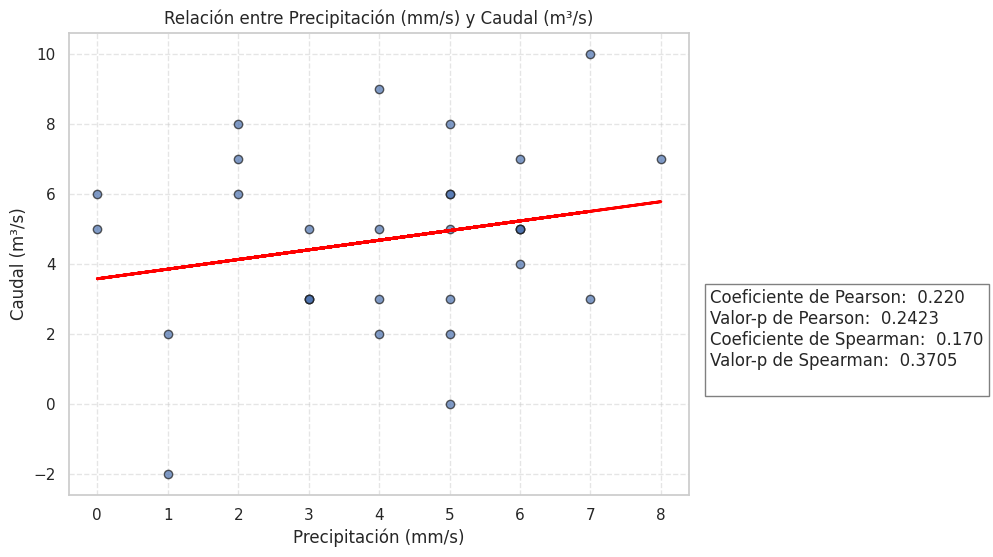

Interpretación de Resultados
- No se encontró evidencia suficiente de una correlación lineal significativa entre Precipitación (mm/s) y Caudal (m³/s) (r = 0.220, p = 0.2423).
- No se encontró evidencia suficiente de una correlación monótona significativa entre Precipitación (mm/s) y Caudal (m³/s) (ρ = 0.170, p = 0.3705).
- En general, los resultados sugieren que no hay una relación estadísticamente significativa entre Precipitación (mm/s) y Caudal (m³/s).


In [9]:
# 1. Crear base y semilla (ya se hizo en la primera celda)

# 2. Generar la 2a variable

media_teorica1= (base % 10) + 3
desviacion1= 3

variable_name1 = "Caudal (m³/s)"
variable1 = np.random.normal(loc=media_teorica1, scale=desviacion1, size=n)
variable1 = np.round(variable1).astype(int)

# Convertir a DataFrame para facilidad
datos = pd.DataFrame({
    f"{variable_name}": variable,
    f"{variable_name1}": variable1
})

x= datos[f"{variable_name}"]
y= datos[f"{variable_name1}"]

# 3. Correlaciones de Pearson y Spearman
def calcular_correlaciones(x, y):
    pearson, pearson_p = stats.pearsonr(x, y)
    spearman, spearman_p = stats.spearmanr(x, y)
    return pearson, pearson_p, spearman, spearman_p

pearson, pearson_p, spearman, spearman_p = calcular_correlaciones(x, y)

# 4. Gráfico de dispersión
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')

m, b = np.polyfit(x, y, 1)  # pendiente y ordenada al origen
plt.plot(x, m*x + b, color="red", linewidth=2, label="Tendencia lineal")

plt.title(f"Relación entre {variable_name} y {variable_name1}")
plt.xlabel(variable_name)
plt.ylabel(variable_name1)

texto = (f"Coeficiente de Pearson: {pearson: .3f}\n"
         f"Valor-p de Pearson: {pearson_p: .4f}\n"
         f"Coeficiente de Spearman: {spearman: .3f}\n"
         f"Valor-p de Spearman: {spearman_p: .4f}\n"
         )
plt.text(8.7, 0.5, texto,
         bbox=dict(facecolor="white", edgecolor="grey"))

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#6. Interpretación de resultados
print("Interpretación de Resultados")

# Pearson
if pearson_p < 0.05:
    print(f"- Existe una correlación lineal estadísticamente significativa entre "
          f"{variable_name} y {variable_name1} (r = {pearson:.3f}, p = {pearson_p:.4f}).")
else:
    print(f"- No se encontró evidencia suficiente de una correlación lineal significativa "
          f"entre {variable_name} y {variable_name1} (r = {pearson:.3f}, p = {pearson_p:.4f}).")

# Spearman
if spearman_p < 0.05:
    print(f"- Existe una correlación monótona estadísticamente significativa entre "
          f"{variable_name} y {variable_name1} (ρ = {spearman:.3f}, p = {spearman_p:.4f}).")
else:
    print(f"- No se encontró evidencia suficiente de una correlación monótona significativa "
          f"entre {variable_name} y {variable_name1} (ρ = {spearman:.3f}, p = {spearman_p:.4f}).")

# Comparación general
if pearson_p < 0.05 or spearman_p < 0.05:
    print(f"- En general, se observa una relación entre {variable_name} y {variable_name1}, "
          f"representada gráficamente por la línea de tendencia.")
else:
    print(f"- En general, los resultados sugieren que no hay una relación estadísticamente significativa "
          f"entre {variable_name} y {variable_name1}.")

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas simuladas a partir de tu número de cédula.

1. Usa los **6 últimos dígitos** de tu cédula como base para generar una semilla reproducible.
2. Simula una muestra de **60 personas** con dos variables categóricas:
   - `Nivel educativo`: Básico, Medio, Superior.
   - `Acceso a internet`: Sí, No.
3. Crea una **tabla de contingencia** entre ambas variables.
4. Aplica la **prueba de Chi cuadrado de independencia**.
5. Visualiza la distribución conjunta con un mapa de calor (ver la imagen de con la información de ejemplo).
6. Interpreta el resultado.


Tabla de contingencia:
Consumo de frutas        No  Sí
Frecuencia de ejercicio        
Frecuente                 9   7
Nunca                     7  17
Ocasional                 9  11

Resultados Chi-Cuadrado:
Chi2 = 3.034
Grados de libertad = 2
Valor-p = 0.2193

Frecuencias esperadas:
Consumo de frutas               No         Sí
Frecuencia de ejercicio                      
Frecuente                 6.666667   9.333333
Nunca                    10.000000  14.000000
Ocasional                 8.333333  11.666667


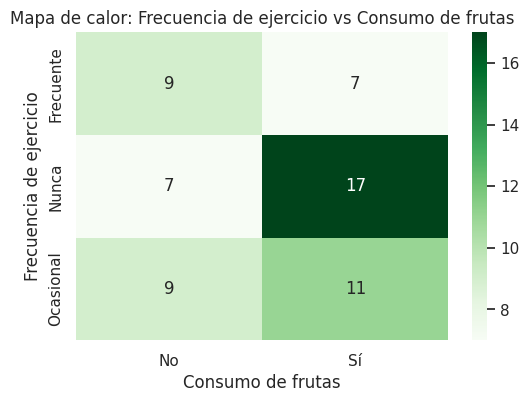

Interpretación de Resultados
Hipótesis nula (H₀): La frecuencia con la que las personas hacen ejercicio es independiente del consumo de frutas.
Hipótesis alternativa (H₁): La frecuencia de ejercicio está asociada al consumo de frutas.
 
- El valor de χ² es bajo y el valor-p es igual o mayor a 0.05, lo que indica que no hay evidencia suficiente para rechazar la hipótesis de independencia.
  Esto significa que, según los datos analizados, no se encontró una relación estadísticamente significativa entre la frecuencia de ejercicio y el consumo de frutas.
  Es posible que estas variables no estén asociadas en esta población o que se requiera una muestra más grande para detectar una relación.


In [14]:
#1. La semilla reproducible ya fue creada en la primera celda

#2. Condiciones de la muestra
n = 60
frecuencia_ejercicio = ["Nunca", "Ocasional", "Frecuente"]
consumo_frutas = ["Sí", "No"]

ejercicio = np.random.choice(frecuencia_ejercicio, size=n, p=[0.25, 0.45, 0.30])
frutas = np.random.choice(consumo_frutas, size=n, p=[0.65, 0.35])

# Crear DataFrame
datos = pd.DataFrame({
    "Frecuencia de ejercicio": ejercicio,
    "Consumo de frutas": frutas
})

#3. Tabla de contingencia
tabla = pd.crosstab(datos["Frecuencia de ejercicio"], datos["Consumo de frutas"])
print("Tabla de contingencia:")
print(tabla)

#4. Prueba Chi-cuadrado de independencia
chi2, p, dof, expected = chi2_contingency(tabla)
print("\nResultados Chi-Cuadrado:")
print(f"Chi2 = {chi2:.3f}")
print(f"Grados de libertad = {dof}")
print(f"Valor-p = {p:.4f}")
print("\nFrecuencias esperadas:")
print(pd.DataFrame(expected, index=tabla.index, columns=tabla.columns))

#5. Visualización con mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(tabla, annot=True, fmt="d", cmap="Greens")
plt.title("Mapa de calor: Frecuencia de ejercicio vs Consumo de frutas")
plt.show()

#6. Interpretación
print("Interpretación de Resultados")
print("Hipótesis nula (H₀): La frecuencia con la que las personas hacen ejercicio es independiente del consumo de frutas.")
print("Hipótesis alternativa (H₁): La frecuencia de ejercicio está asociada al consumo de frutas.")
print(" ")
if p < 0.05 and chi2 > 0:
    print("- El valor de χ² es elevado y el valor-p es menor a 0.05, lo que indica que se rechaza la hipótesis nula de independencia.")
    print("  Esto sugiere que existe una asociación estadísticamente significativa entre la frecuencia con la que las personas hacen ejercicio y si consumen frutas o no.")
    print("  En otras palabras, el hábito de ejercicio podría estar relacionado con el consumo de frutas en esta muestra.")
elif p >= 0.05 and chi2 >= 0:
    print("- El valor de χ² es bajo y el valor-p es igual o mayor a 0.05, lo que indica que no hay evidencia suficiente para rechazar la hipótesis de independencia.")
    print("  Esto significa que, según los datos analizados, no se encontró una relación estadísticamente significativa entre la frecuencia de ejercicio y el consumo de frutas.")
    print("  Es posible que estas variables no estén asociadas en esta población o que se requiera una muestra más grande para detectar una relación.")
else:
    print("- Los resultados no son concluyentes. Se recomienda revisar la calidad de los datos o considerar un tamaño muestral mayor.")

